# K NN algorithm

In [12]:
#Importing Libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

In [13]:
#Load the Diabetes dataset
df = pd.read_csv("diabetes.csv")

In [14]:
df.shape

(768, 9)

In [15]:
#Display first 5 rows of dataset 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
#Independent Variable
x = df.drop('Outcome', axis=1).values

In [17]:
#Dependent Variable 
y=df['Outcome'].values

In [18]:
#Split the dataset into training and testing sets 
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [19]:
#Set up KNN Classifier with k neighbors
neighbour = np.arange(1,9)
train_acc = np.empty(len(neighbour))
test_acc= np.empty(len(neighbour))

In [20]:
for i,k in enumerate(neighbour):
    knn = KNeighborsClassifier(n_neighbors=k) 
    #Fit the model
    knn.fit(x_train,y_train)
train_acc[i] = knn.score (x_train,y_train) 
test_acc[i] = knn.score (x_test,y_test)

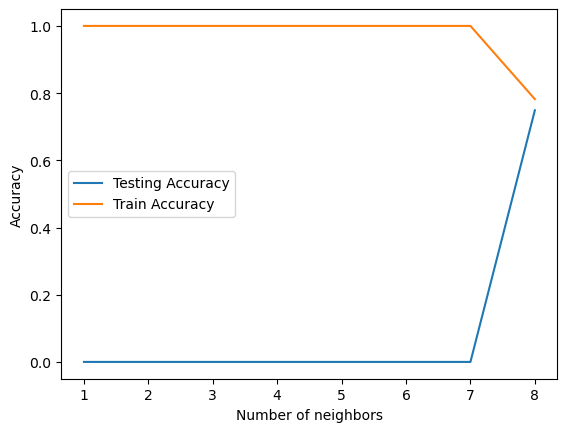

In [21]:
#Plot Accuracy
import matplotlib.pyplot as plt
plt.plot(neighbour, test_acc, label='Testing Accuracy') 
plt.plot(neighbour, train_acc, label='Train Accuracy') 
plt.legend()
plt.xlabel("Number of neighbors") 
plt.ylabel("Accuracy")
plt.show()

In [22]:
#Predict the model 
y_pred = knn.predict(x_test)

In [25]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score 
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test,y_pred)

In [26]:
print("Accuracy:",ac)

Accuracy: 0.7489177489177489


In [27]:
print(cm)

[[139  18]
 [ 40  34]]


In [28]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.65      0.46      0.54        74

    accuracy                           0.75       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231

